주 요소 회귀 (PCR)는 sklearn 라이브러리의 일부인 PCA() 함수를 사용하여 수행 할 수 있습니다. 이 실험실에서는 Salary 를 예측하기 위해 Hitters 데이터에 PCR을 적용합니다. 이전 실습에서와 마찬가지로 누락 된 값이 데이터에서 제거되었는지 확인하여 시작할 것입니다.

회귀분석 시 변수들 간의 다중공선성 문제가 있을 때 주성분을 통한 회귀분석 필요

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error

# 다중공선성확인

In [2]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [10]:
data=pd.read_excel('D:/2018-2_ck project/final.xlsx')

In [11]:
data.columns

Index(['year', 'broad_kbs', 'broad_mbc', 'broad_sbs', 'broad_jtbc',
       'broad_tvn', 'broad_mnet', 'broad_etc', 'age_12', 'age_15', 'age_19',
       'age_all', 'week_mon', 'week_tue', 'week_wed', 'week_thu', 'week_fri',
       'week_sat', 'week_sun', 'tw_gold', 'tw_week', 'tw_etc', 'ca_mc',
       'ca_gag', 'ca_tal', 'ca_sing', 'ca_act', 'ca_bro', 'ca_etc',
       'log_award', 'log_max', 'log_pro1', 'log_pro2', 'log_pd_award',
       'log_pd_max', 'log_pd_pro1', 'log_pd_pro2', 'portal_naver',
       'portal_daum', 'pd_portal', 'y', 'logy'],
      dtype='object')

In [12]:
var="broad_kbs+broad_mbc+broad_sbs+broad_jtbc+broad_tvn+broad_mnet+broad_etc+age_12+age_15+age_19+age_all+week_mon+week_tue+week_wed+week_thu+week_fri+week_sat+week_sun+tw_gold+tw_week+tw_etc+ca_mc+ca_gag+ca_tal+ca_sing+ca_act+ca_bro+ca_etc+log_award+log_max+log_pro1+log_pro2+log_pd_award+log_pd_max+log_pd_pro1+log_pd_pro2+portal_naver+portal_daum+pd_portal"

In [13]:
var

'broad_kbs+broad_mbc+broad_sbs+broad_jtbc+broad_tvn+broad_mnet+broad_etc+age_12+age_15+age_19+age_all+week_mon+week_tue+week_wed+week_thu+week_fri+week_sat+week_sun+tw_gold+tw_week+tw_etc+ca_mc+ca_gag+ca_tal+ca_sing+ca_act+ca_bro+ca_etc+log_award+log_max+log_pro1+log_pro2+log_pd_award+log_pd_max+log_pd_pro1+log_pd_pro2+portal_naver+portal_daum+pd_portal'

In [14]:
y,X=dmatrices("logy~"+var,data=data, return_type="dataframe")

In [16]:
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [17]:
result=sm.OLS(y,X).fit()

In [18]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   logy   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     5.071
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           3.50e-16
Time:                        14:57:08   Log-Likelihood:                -214.15
No. Observations:                 518   AIC:                             494.3
Df Residuals:                     485   BIC:                             634.5
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.2738      0.073     -3.751   

In [316]:
#p-value 0.5넘을 경우 다중공선성 의심
# broad_mbc, broad_mnet, age_12, age_19, week_mon, week_tue, week_wed, ca_gag, ca_bro, log_pro1, log_pd_award, log_pd_pro1, log_pd_pro2  의심

# PCR

In [59]:
#분할

In [19]:
train = pd.read_excel('D:/2018-2_ck project/final_train_delete.xlsx')
test= pd.read_excel('D:/2018-2_ck project/final_test.xlsx')

In [22]:
x_train=train.iloc[:,1:-2]
y_train=train.iloc[:,-1]

In [28]:
x_test=test.iloc[:,1:-2]
y_test=test.iloc[:,-1]

In [29]:
pca2 = PCA()

In [30]:
X_reduced_train = pca2.fit_transform(scale(x_train))

각각의 연속적인 주성분을 더함으로써 설명되는 분산의 양을 얻기 위해 약간의 계산을 함

In [31]:
np.cumsum(np.round(pca2.explained_variance_ratio_, decimals=4)*100)

array([ 10.29,  17.69,  23.96,  29.9 ,  34.64,  39.01,  43.21,  47.01,
        50.61,  54.07,  57.46,  60.66,  63.73,  66.67,  69.5 ,  72.26,
        74.9 ,  77.4 ,  79.77,  81.98,  84.13,  86.18,  88.13,  89.97,
        91.75,  93.43,  94.95,  96.29,  97.6 ,  98.71,  99.45, 100.  ,
       100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  ])

MSE에 어떻게 영향을 주는지 확인하기 위해 10 배 교차 유효성 검사를 수행

In [32]:
# 10 배 CV, 셔플 사용
n = len(X_reduced_train)
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []


In [33]:
# 절편 만있는 MSE 계산 (회귀 분석에서 주요 구성 요소 없음)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)
score

0.12363768247587466

In [34]:
 # 19 가지 주요 구성 요소에 대해 CV를 사용하여 MSE를 계산하고 그 때 한 구성 요소를 추가
for i in np.arange(1, 25):
    score = -1*model_selection.cross_val_score(regr, X_reduced_train[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

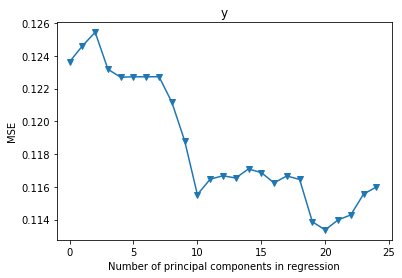

In [35]:
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')#'회귀 분석의 주요 구성 요소 수' 
plt.ylabel('MSE')
plt.title('y')
plt.xlim(xmin=-1);

가장 낮은 유효성 검사 오류는  M=20 구성 요소가 사용될 때 발생합니다. 이제 테스트 데이터에서 어떻게 수행되는지 확인하고 다음과 같이 테스트 MSE를 계산합니다.

In [133]:
# 훈련 데이터에 대한 회귀 모델 모델링

In [36]:
 X_reduced_test = pca2 .  transform ( scale( x_test )) [:, : 21]

In [37]:
regr = LinearRegression()
regr.fit(X_reduced_train[:,:21], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [132]:
 # 테스트 데이터로 예측

In [38]:
#M=21

In [39]:
pred = regr.predict(X_reduced_test)
mse=mean_squared_error(pred, y_test)
mse

0.296191741742207

In [40]:
rmse=np.sqrt(mse)
rmse

0.5442350059874934

In [97]:
#R^2=(SSR/TSS)

In [41]:
sst=sum((y_test-pred+pred-np.mean(y_test))**2)
ssr=sum((pred-np.mean(y_test))**2)
r_square=(ssr/sst)
r_square

0.4077176767161424